# Assignment 1: k-nearest neighbors (Programming) 

Only use the already imported libraries `numpy` and `matplotlib.pyplot` for the assignment. Do not import any other library. 

==> *Write*
* *names* 
* *matr. nr.* 
* *study program*
* *B.Sc./M.Sc.*

*of all assignment group participants here.* (double klick here to edit)*

In [35]:
# Load required packages and dataset. Do not modify.
import matplotlib.pyplot as plt
import numpy as np

def load_breast_cancer_dataset():
    from sklearn import datasets
    breast_cancer = datasets.load_breast_cancer()
    X = breast_cancer.data
    y = breast_cancer.target
    return X, y
    
X, y = load_breast_cancer_dataset()


## Task 1: Visualization and Preprocessing

1) Explain the content of the dataset in few words. What are the input features? What is the classification target? Check out: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)


Attributes:
1. radius (mean)
2. texture (mean)
3. perimeter (mean)
4. area (mean)
5. smoothness (mean)
6. compactness (mean)
7. concavity (mean)
8. concave points (mean)
9. symmetry (mean)
10. fractal dimension (mean)
11. radius (standard error)
12. texture (standard error)
13. perimeter (standard error)
14. area (standard error)
15. smoothness (standard error)
16. compactness (standard error)
17. concavity (standard error)
18. concave points (standard error)
19. symmetry (standard error)
20. fractal dimension (standard error)
21. radius (worst)
22. texture (worst)
23. perimeter (worst)
24. area (worst)
25. smoothness (worst)
26. compactness (worst)
27. concavity (worst)
28. concave points (worst)
29. symmetry (worst)
30. fractal dimension (worst)

class:
WDBC-Malignant
WDBC-Benign

2) Compute and print the following statistics about the dataset:
  - Number of samples
  - Number of samples per class
  - Mean and standard deviation for each input feature


In [36]:
n_sample = X.shape[0]
n_feature = X.shape[1]

print(f'Number of samples: {n_sample}')
feature_names = ['radius (mean)',
    'texture (mean)',
    'perimeter (mean)',
    'area (mean)',  
    'smoothness (mean)', 
    'compactness (mean)',
    'concavity (mean)',
    'concave points (mean)',
    'symmetry (mean)', 
    'fractal dimension (mean)',
    'radius (standard error)',
    'texture (standard error)',
    'perimeter (standard error)',
    'area (standard error)',  
    'smoothness (standard error)', 
    'compactness (standard error)',
    'concavity (standard error)',
    'concave points (standard error)',
    'symmetry (standard error)', 
    'fractal dimension (standard error)',
    'radius (worst)'
    'texture (worst)',
    'perimeter (worst)',
    'area (worst)',  
    'smoothness (worst)', 
    'compactness (worst)',
    'concavity (worst)',
    'concave points (worst)',
    'symmetry (worst)', 
    'fractal dimension (worst)'
]

    
class_names = ['WDBC-Malignant', 'WDBC-Benign']

for class_idx, class_name in enumerate(class_names):
    print(f'- Number of samples for {class_name}: {len(y[y==class_idx])}')
print(f'\n')

for feature_idx, feature_name in enumerate(feature_names):
    print(f'{feature_name}:')
    mean = np.mean(X[:, feature_idx])
    print(f'- mean: {mean:.2f}')
    sigma = np.sqrt(1/n_sample*np.sum((X[:, feature_idx] - mean)**2))
    print(f'- standard deviation: {sigma:.2f}\n')

Number of samples: 569
- Number of samples for WDBC-Malignant: 212
- Number of samples for WDBC-Benign: 357


radius (mean):
- mean: 14.13
- standard deviation: 3.52

texture (mean):
- mean: 19.29
- standard deviation: 4.30

perimeter (mean):
- mean: 91.97
- standard deviation: 24.28

area (mean):
- mean: 654.89
- standard deviation: 351.60

smoothness (mean):
- mean: 0.10
- standard deviation: 0.01

compactness (mean):
- mean: 0.10
- standard deviation: 0.05

concavity (mean):
- mean: 0.09
- standard deviation: 0.08

concave points (mean):
- mean: 0.05
- standard deviation: 0.04

symmetry (mean):
- mean: 0.18
- standard deviation: 0.03

fractal dimension (mean):
- mean: 0.06
- standard deviation: 0.01

radius (standard error):
- mean: 0.41
- standard deviation: 0.28

texture (standard error):
- mean: 1.22
- standard deviation: 0.55

perimeter (standard error):
- mean: 2.87
- standard deviation: 2.02

area (standard error):
- mean: 40.34
- standard deviation: 45.45

smoothness (standar

3) Visualize the variables *radius (mean)* and *texture (mean)* in a scatter plot (*radius (mean)* on the x-axis, *texture (mean)* on the y-axis). Color each point of the plot according to its class.

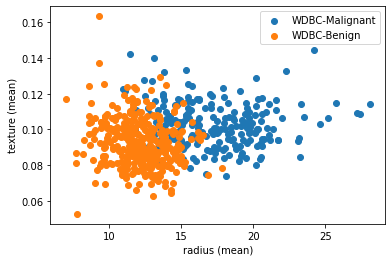

In [37]:
fig, ax = plt.subplots(1, 1)
for class_idx, class_name in enumerate(class_names):
    ax.scatter(X[y == class_idx, 0], X[y == class_idx, 4], label=class_name)
    
ax.set_xlabel('radius (mean)')
ax.set_ylabel('texture (mean)')
ax.legend()

4) Split the dataset randomly into training and test data. 70% of data should be used for training and 30% should be used for testing. Implement the function `train_test_split`. Do not modify the interface of the function.

In [38]:
def train_test_split(X, y):
    """
    Returns X_train, X_test, y_train, y_test, 
        where X_train and X_test are the input features of the training and test set,
        and y_train and y_test are the class labels of the training and test set.
    """
    np.random.seed(2021)  # Ensure that the random split always returns the same result.
    
    train_split = 0.7
    n_train = int(train_split * n_sample)
    # generate random index
    pos_train = np.random.choice(np.arange(0, n_sample, 1), (n_train,), replace=False)
    b_pos_train = np.zeros_like(y, dtype=bool)
    
    b_pos_train[pos_train] = True
    b_pos_test = ~b_pos_train
    
    X_train = X[b_pos_train, :]
    X_test = X[b_pos_test, :]
    y_train = y[b_pos_train]
    y_test = y[b_pos_test]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y)

assert (X_train.shape[0] + X_test.shape[0]) == X.shape[0]
assert (y_test.shape[0] + y_train.shape[0]) == y.shape[0]
assert X_train.shape[1] == X_test.shape[1]

5) kNN uses a distance measure to identify close neighbors. If the input features are not of the same scale, the distance is not as meaningful, which can negatively impact classification performance. Perform min-max scaling (i.e. scale the values of the input features in such a way that their range is from 0 to 1) on the training and test data. Remember that you should only use information from the training data to perform the scaling on both data sets.

In [39]:
def min_max_scaling(data, dmin, dmax):
    return (data-dmin)/(dmax-dmin)

for feature_idx, _ in enumerate(feature_names):
    min_X = np.min(X_train[:, feature_idx])
    max_X = np.max(X_train[:, feature_idx])
    X_train[:, feature_idx] = min_max_scaling(X_train[:, feature_idx], min_X, max_X)
    X_test[:, feature_idx] = min_max_scaling(X_test[:, feature_idx], min_X, max_X)

## Task 2: k-nearest neighbors 
*Choose classes randomly if weights are equal for multiple classes*

**For B.Sc. Data Science:**  

Implement the kNN algorithm with uniform weighting and arbitrary `k`. Fill out the `predict` method of class `KNearestNeighbors`. 

Use Euclidean distance to determine the nearest neighbors.
You can ignore the optional parameter `weights`, which is provided as a field in the kNN class.

**For all students other than B.Sc. Data Science:**

Implement the kNN algorithm with uniform and distance-based weighting and arbitrary `k`.
Fill out the `predict` method of class `KNearestNeighbors`.

The parameter `weights` will either contain the string `uniform` or `distance`. 
- If the value is `uniform`, the classifier should use the Euclidean distance for determining nearest neighbors and uniform weighting. 
- If the value is a `distance`, the classifier should use the Euclidean distance for determining neares neighbors and perform distance-weighted classification.

In [40]:
class KNearestNeighbors(object):
    def __init__(self, k, weights='uniform'):
        self.k = k
        self.weights = weights
        
    def fit(self, X, y):
        """
        This functions saves the training data to be used during the prediction.
        """
        self.X = X
        self.y = y
    
    def predict(self, X):
        """
        Returns a vector of shape (n,) if X has shape (n,d), 
        where n is the number of samples and d is the number of features.
        """
        
        # Initialization
        n, d = X.shape
        n_train, d_train = self.X.shape
        y_hat = np.zeros(n)
        # Distances of X samples with respect to self.X
        distance = np.zeros_like(self.y, dtype=float)

        # iterate over all samples in the test data set X
        for sample_idx in range(n):
            sample = X[sample_idx, :]
            
            # Compute distance between sample (X) and training features (self.X)
            for n_train_idx in range(n_train):
                distance[n_train_idx] = euclidean_distance(sample, self.X[n_train_idx, :])
                    
            # Get class value and argument (position) of smallest k elements of distance list
            dist_k_neighbor = np.partition(distance, self.k)[:self.k]
            pos_k_neighbor = np.argpartition(distance, self.k)[:self.k]
            class_k_neighbor = self.y[pos_k_neighbor]
            
            # Count occurrence of class id in neighbors
            count_class = np.zeros(len(class_names))
            for neighbor_idx, neighborClass in enumerate(class_k_neighbor):
                for class_idx in range(len(class_names)):
                    if neighborClass == class_idx:
                        if self.weights == 'uniform': # each occurrence of a neighbor counts equally
                            count_class[class_idx] += 1
                        elif self.weights == 'distance': # each occurrence of a neighbor is weighted with the distnace
                            # distance of 0 indicates an already seen instance
                            # 1/0 should accordingly result in an infinitely large weight
                            # we therefore supress divide by 0 warnings for this computation
                            with np.errstate(divide='ignore'):
                                count_class[class_idx] += 1/dist_k_neighbor[neighbor_idx]
                        else:
                            raise NotImplementedError()
                            
            # check if max value is twice in count list
            max_class_count = np.max(count_class)
            max_class_count_list = np.where(count_class == max_class_count)[0]
            if len(max_class_count_list) > 1:
                y_hat[sample_idx] = np.random.choice(max_class_count_list)
            else:
                y_hat[sample_idx] = np.argmax(count_class)
        
        return y_hat
        

    
def euclidean_distance(x1, x2):
    """
    Given vectors x1 and x2 with shape (n,) returns distance between vectors as float.
    """
    return np.sqrt(np.sum((x1 - x2)*(x1 - x2)))

## Task 3: Evaluation

1) Implement functions to compute precision, recall and F1-score. `y_pred` and `y_true` are the vectors of predicted and true class labels respectively with shape `(n,)`, where `n` is the number of samples. Each function should return a float containing the corresponding score. It is advisable to implement a function for the confusion matrix and reuse it.

In [41]:
def precision(y_pred, y_true):
    # We compute the macro-average
    labels = set(y_pred).union(set(y_true))
    precisions = list()
    for label in labels:
        tp, fp, _, _ = confusion_matrix(y_pred, y_true, label)
        if (tp + fp) == 0:
            prec = 0
        else:
            prec = tp / (tp + fp)
        precisions.append(prec)
    return np.mean(precisions)


def recall(y_pred, y_true):
    # We compute the macro-average
    labels = set(y_pred).union(set(y_true))
    recalls = list()
    for label in labels:
        tp, _, _, fn = confusion_matrix(y_pred, y_true, label)
        recalls.append(tp / (tp + fn))
    return np.mean(recalls)


def f1score(y_pred, y_true):
    # We compute the macro-average
    labels = set(y_pred).union(set(y_true))
    f1scores = list()
    for label in labels:
        tp, fp, _, fn = confusion_matrix(y_pred, y_true, label)
        if (tp + fp) == 0:
            prec = 0
        else:
            prec = tp / (tp + fp)
        rec = tp / (tp + fn)
        f1scores.append(2 * (prec * rec) / (prec + rec))
    return np.mean(f1scores)


def confusion_matrix(y_pred, y_true, target_label):
    # Count true positive, false positives, true negatives, false negatives for a specific class.
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for yp, yt in zip(y_pred, y_true):
        if yp == yt and yt == target_label: # tp
            tp += 1
        elif yp != yt and yp == target_label: # fp
            fp += 1
        elif yp == yt and yp != target_label: # tn
            tn += 1
        else: # fn
            fn += 1
    return tp, fp, tn, fn

2) Evaluate the performance of kNN with uniform weighting on the Breast Cancer dataset for `k=1,5,9`. Train each of the `3` classifiers on the training data from Task 1. Perform the predictions on both the training and test data. Then compute precision, recall, and F1-score for each model and for both training and test data. Visualize the performance in a plot, what do you observe?

**For all students other than B.Sc. Data Science:** 

Also evaluate the kNN classifier with Euclidean distance-weighting. Compare the performance to uniform-weighting. How does the performance change compared to uniform weighting for each `k`?

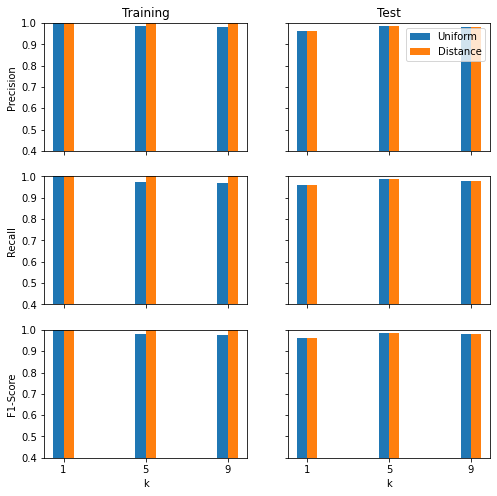

In [42]:
k_tuple = (1, 5, 9)
metric_tuple = ('uniform', 'distance')
hyperparameters = [(k, metric) for metric in metric_tuple for k in k_tuple]

scores = []
for k, metric in hyperparameters:
    kNN = KNearestNeighbors(
        k=k, 
        weights=metric
    )
    
    # train
    kNN.fit(X_train, y_train)
    
    # predict
    y_hat_train = kNN.predict(X_train)
    y_hat_test = kNN.predict(X_test)

    scores.append([
        [fnc(y_hat, y) for fnc in (precision, recall, f1score)] 
        for y_hat, y in ((y_hat_train, y_train), (y_hat_test, y_test))
    ])

# print
scores = np.array(scores)
ks = np.array(k_tuple)
fig, ax = plt.subplots(3, 2, figsize=(8, 8), sharex=True, sharey=True)
for row in range(3):
    for col in range(2):
        ax[row, col].bar(ks-0.25, scores[:len(k_tuple), col, row], width=0.5, label='Uniform')
        ax[row, col].bar(ks+0.25, scores[len(k_tuple):, col, row], width=0.5, label='Distance')
        ax[row, col].set_ylim((0.4, 1.0))
        
ax[0, 0].set_ylabel('Precision')
ax[1, 0].set_ylabel('Recall')
ax[2, 0].set_ylabel('F1-Score')
ax[0, 0].set_title('Training')
ax[0, 1].set_title('Test')
ax[-1, 0].set_xlabel('k')
ax[-1, 1].set_xlabel('k')
ax[-1, 0].set_xticks(ks)
ax[0, 1].legend();



- distance-weighted kNN achieves perfect results on training data due to infinity-valued weights for training samples
- to identify the best classifier we have to look only at the test data